In [78]:
import pandas as pd
from datetime import datetime
import json
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

In [2]:
sample_size = 100000
train_data_path = 'otto-recommender-system/train.jsonl'
chunks = pd.read_json(train_data_path, lines=True, chunksize = sample_size)

for c in chunks:
    train_data_df = c
    break

In [3]:
train_data_df.head(3)

,session,events
0,0,"[{'aid': 1517085, 'ts': 1659304800025, 'type':..."
1,1,"[{'aid': 424964, 'ts': 1659304800025, 'type': ..."
2,2,"[{'aid': 763743, 'ts': 1659304800038, 'type': ..."


In [4]:
# Review data for a single session:

session_1_df = pd.DataFrame(train_data_df.iloc[1,1])

In [5]:
session_1_df.sort_values(['aid','ts'], ascending=[True, True])

,aid,ts,type
21,50049,1659991115562,clicks
22,105393,1659991156255,clicks
23,105393,1659991168139,carts
10,109488,1659473065576,clicks
28,207905,1661686200666,clicks
16,215311,1659990959575,clicks
17,215311,1659990964841,carts
30,376932,1661705869789,clicks
0,424964,1659304800025,carts
7,424964,1659385993848,clicks


In [6]:
session_1_df.groupby('type').agg(count_action=('aid','size'))

,count_action
type,
carts,8
clicks,24


In [7]:
session_1_df.loc[:,'ts'] = session_1_df.loc[:,'ts'].apply(lambda x: pd.to_datetime(datetime.fromtimestamp(x/1000)))

In [8]:
session_1_df.head(8)

,aid,ts,type
0,424964,2022-07-31 17:00:00.025,carts
1,1492293,2022-07-31 17:00:52.871,clicks
2,1492293,2022-07-31 17:01:03.627,carts
3,910862,2022-07-31 17:01:31.923,clicks
4,910862,2022-07-31 17:01:40.209,carts
5,1491172,2022-08-01 15:32:19.248,clicks
6,1491172,2022-08-01 15:32:25.915,carts
7,424964,2022-08-01 15:33:13.848,clicks


In [9]:
session_1_df['time_diff'] = session_1_df['ts'].diff(1)

In [10]:
session_1_df.loc[:,'milliseconds_elapsed'] = session_1_df.loc[:,'time_diff'].apply(lambda x: x.total_seconds())

In [11]:
session_1_df

,aid,ts,type,time_diff,milliseconds_elapsed
0,424964,2022-07-31 17:00:00.025,carts,NaT,NaN
1,1492293,2022-07-31 17:00:52.871,clicks,0 days 00:00:52.846000,52.846
2,1492293,2022-07-31 17:01:03.627,carts,0 days 00:00:10.756000,10.756
3,910862,2022-07-31 17:01:31.923,clicks,0 days 00:00:28.296000,28.296
4,910862,2022-07-31 17:01:40.209,carts,0 days 00:00:08.286000,8.286
5,1491172,2022-08-01 15:32:19.248,clicks,0 days 22:30:39.039000,81039.039
6,1491172,2022-08-01 15:32:25.915,carts,0 days 00:00:06.667000,6.667
7,424964,2022-08-01 15:33:13.848,clicks,0 days 00:00:47.933000,47.933
8,1515526,2022-08-01 15:33:45.990,clicks,0 days 00:00:32.142000,32.142
9,440486,2022-08-02 15:43:34.870,clicks,1 days 00:09:48.880000,86988.880


In [12]:
train_data_df.head()

,session,events
0,0,"[{'aid': 1517085, 'ts': 1659304800025, 'type':..."
1,1,"[{'aid': 424964, 'ts': 1659304800025, 'type': ..."
2,2,"[{'aid': 763743, 'ts': 1659304800038, 'type': ..."
3,3,"[{'aid': 1425967, 'ts': 1659304800095, 'type':..."
4,4,"[{'aid': 613619, 'ts': 1659304800119, 'type': ..."


In [13]:

df_dict = {}
for i,row in (train_data_df).iterrows():
    df_dict[row['session']]= pd.DataFrame(row['events'])
    df = df_dict[row['session']]
    df['session_id'] = row['session']

In [16]:
all_dfs = [v for k,v in df_dict.items()]

In [17]:
all_dfs_concat = pd.concat(all_dfs)

In [ ]:
all_dfs_concat.to_parquet("./all_dfs_concat.parquet")

In [34]:
all_dfs_concat.set_index("session_id", inplace=True)

In [43]:
all_dfs_concat.loc[0:10]

,aid,ts,type
session_id,,,
0,1517085,1659304800025,clicks
0,1563459,1659304904511,clicks
0,1309446,1659367439426,clicks
0,16246,1659367719997,clicks
0,1781822,1659367871344,clicks
...,...,...,...
10,967918,1660941383175,clicks
10,218627,1660941816696,clicks
10,766870,1660987307792,clicks


In [44]:
all_dfs_concat = pd.read_pickle("all_dfs_concat.pkl")

In [45]:
# all_dfs_concat.loc[:,'time_stamp'] = all_dfs_concat.loc[:,'ts'].apply(lambda x: pd.to_datetime(datetime.fromtimestamp(x/1000)))
all_dfs_concat.loc[:,'time_stamp'] = pd.to_datetime(all_dfs_concat['ts'], unit='ms')

In [46]:
all_dfs_concat

,aid,ts,type,session_id,time_stamp
0,1517085,1659304800025,clicks,0,2022-07-31 22:00:00.025
1,1563459,1659304904511,clicks,0,2022-07-31 22:01:44.511
2,1309446,1659367439426,clicks,0,2022-08-01 15:23:59.426
3,16246,1659367719997,clicks,0,2022-08-01 15:28:39.997
4,1781822,1659367871344,clicks,0,2022-08-01 15:31:11.344
...,...,...,...,...,...
13,1544954,1660373630318,clicks,99999,2022-08-13 06:53:50.318
14,1032408,1660373656430,clicks,99999,2022-08-13 06:54:16.430
15,1544954,1660373678083,clicks,99999,2022-08-13 06:54:38.083
16,554230,1660373715477,clicks,99999,2022-08-13 06:55:15.477


In [47]:
(all_dfs_concat['type']) = (all_dfs_concat['type']).astype('category')

In [48]:
all_dfs_concat.head()

,aid,ts,type,session_id,time_stamp
0,1517085,1659304800025,clicks,0,2022-07-31 22:00:00.025
1,1563459,1659304904511,clicks,0,2022-07-31 22:01:44.511
2,1309446,1659367439426,clicks,0,2022-08-01 15:23:59.426
3,16246,1659367719997,clicks,0,2022-08-01 15:28:39.997
4,1781822,1659367871344,clicks,0,2022-08-01 15:31:11.344


In [43]:
all_dfs_concat[all_dfs_concat['session_id']==34857]

,aid,ts,type,session_id,time_stamp,time_diff
0,1794342,1659307143781,clicks,34857,2022-07-31 22:39:03.781,-1.628386e+09
1,1794342,1659307143781,clicks,34857,2022-07-31 22:39:03.781,0.000000e+00


In [49]:
# total number of actions per session
all_dfs_concat.groupby('session_id').agg(count_action=('aid','size'))

,count_action
session_id,
0,276
1,32
2,33
3,226
4,19
...,...
99995,21
99996,302
99997,112


In [50]:
# calculate the total number orders per session
orders_count_aid = all_dfs_concat[all_dfs_concat['type']=='orders'].groupby('aid').agg(total_orders=('aid','size')).sort_values('total_orders', ascending=False)

In [51]:
orders_count_aid

,total_orders
aid,
80222,127
1022566,106
166037,94
1629608,76
1733943,75
...,...
727990,1
728010,1
728086,1


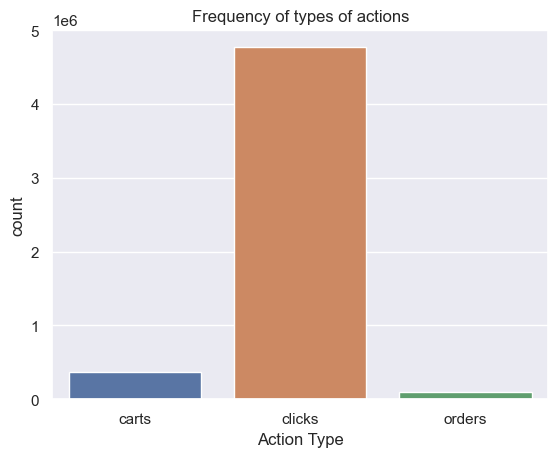

In [83]:
# plot the frequency of types of actions

sns.countplot(x='type', data=all_dfs_concat)
plt.title('Frequency of types of actions')
plt.xlabel('Action Type');

In [70]:
all_dfs_concat_session_length = all_dfs_concat.groupby('session_id').agg(session_length_secs=('time_stamp', lambda x: (x.max() - x.min()).total_seconds()))

In [71]:
all_dfs_concat_session_length

,session_length_secs
session_id,
0,2380183.682
1,2410054.967
2,2409415.621
3,1804866.676
4,2281881.184
...,...
99995,1743071.888
99996,2300943.947
99997,2367980.788


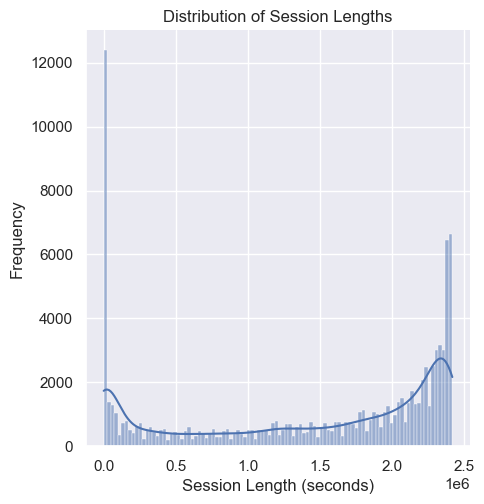

In [80]:
sns.displot(all_dfs_concat_session_length['session_length_secs'], bins=100, kde=True)
plt.title('Distribution of Session Lengths')
plt.xlabel('Session Length (seconds)')
plt.ylabel('Frequency');
